# Derivatives Analytics - Introduction to Object Oriented Programming

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#executive-summary)

**TODO**

### **Resources**: 

**TODO**

# Executive Summary <a name="executive-summary"></a>

**Make intro**

The following sections are organized as follows:

- **TODO**

These are the basic imports that we need to work with NumPy, Pandas and to plot data using Matplotlib functionalities

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for statistical functions
from scipy import stats

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# Introduction to dates management: `datetime` module <a name="introduction-to-dates"></a>

In [2]:
# for date management
import datetime as dt

In [3]:
today = dt.datetime.today()
today

datetime.datetime(2020, 4, 18, 19, 40, 16, 973648)

In [4]:
type(today)

datetime.datetime

In [5]:
my_birthday = dt.datetime(year=1988,month=6,day=1)
my_birthday

datetime.datetime(1988, 6, 1, 0, 0)

In [6]:
type(my_birthday)

datetime.datetime

In [7]:
time_to_date = today - my_birthday
time_to_date

datetime.timedelta(days=11644, seconds=70816, microseconds=973648)

In [8]:
type(time_to_date)

datetime.timedelta

In [9]:
time_to_date.days

11644

In [10]:
time_to_date.days/365

31.9013698630137

In [11]:
date_string = "18-04-2020"
date_string

'18-04-2020'

In [12]:
type(date_string)

str

In [13]:
isinstance(date_string, str)

True

In [14]:
date = dt.datetime.strptime(date_string, "%d-%m-%Y")
date

datetime.datetime(2020, 4, 18, 0, 0)

In [15]:
type(date)

datetime.datetime

In [16]:
isinstance(date, dt.datetime)

True

In [17]:
date_string_from_dt = date.strftime("%d-%m-%Y")
date_string_from_dt

'18-04-2020'

In [18]:
type(date_string_from_dt)

str

In [19]:
isinstance(date_string_from_dt, str)

True

## Non-financial Introduction to OOP <a name="non-financial-introduction-to-oop"></a>

### Without OOP: a person <a name="nonoopperson"></a> 

In [20]:
def say_your_name(name, surname):
    print("My name is {} {}".format(name, surname))

In [21]:
my_name = "Gabriele"
my_surname = "Pompa"

In [22]:
say_your_name(name=my_name, surname=my_surname)

My name is Gabriele Pompa


In [23]:
def say_country_of_birth(country):
    print("My country of birth is {}".format(country))

In [24]:
my_country = "Italy"

In [25]:
say_country_of_birth(my_country)

My country of birth is Italy


In [26]:
def compute_age(birthdate):
    
    today = dt.datetime.today()  
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    if today >= next_birthday:
        age = today.year - birthdate.year
    else:
        age = today.year - birthdate.year - 1
        
    return age

In [27]:
my_birthdate = "01-06-1988"
my_birthdate

'01-06-1988'

In [28]:
my_age = compute_age(birthdate=my_birthdate)
my_age

31

In [29]:
def time_to_birthday(birthdate):
    
    today = dt.datetime.today()
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    return (next_birthday - today).days

In [30]:
days_to_birthday = time_to_birthday(my_birthdate)
days_to_birthday

43

### With OOP: the `Person` class <a name="oopperson"></a> 

In [31]:
class Person(object):
    """
    Person class implementing some typical features of a person.
    
    Attributes:
    -----------
        name (str):                   name string;
        surname (str):                surname string;
        country (str):                country of birth;
        birthdate (str; dt.datetime): date of birth. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        age (int):                    age, as computed by compute_age() method.
    
    Methods:
    --------
        say_your_name: (returns) None
            Prints name and surname.
            
        say_country_of_birth: None
            Prints country of birth.
            
        compute_age: int
            Computes the age, sets self.age attribute and returns it.
            
        time_to_birthday: int
            Computes the number of days left untill next birthdat and return the number.
    
    """
    
    def __init__(self, p_name, p_surname, p_country, p_birthdate):
        self.name      = p_name
        self.surname   = p_surname
        self.country   = p_country
        self.birthdate = dt.datetime.strptime(p_birthdate, "%d-%m-%Y") if isinstance(p_birthdate, str) else p_birthdate
        self.age       = None
    
    def say_your_name(self):
        print("My name is {} {}".format(self.name, self.surname))
        
    def say_country_of_birth(self):
        print("My country of birth is {}".format(self.country))
        
    def compute_age(self):
    
        today = dt.datetime.today()  

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        if today >= next_birthday:
            self.age = today.year - self.birthdate.year
        else:
            self.age = today.year - self.birthdate.year - 1

        return self.age 
    
    def time_to_birthday(self):

        today = dt.datetime.today()

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        return (next_birthday - today).days

In [32]:
gab = Person(p_name = "Gabriele", 
             p_surname = "Pompa", 
             p_country = "Italy", 
             p_birthdate = "01-06-1988")

In [33]:
type(gab)

__main__.Person

In [34]:
gab.name

'Gabriele'

In [35]:
gab.surname

'Pompa'

In [36]:
gab.say_your_name()

My name is Gabriele Pompa


In [37]:
gab.country

'Italy'

In [38]:
gab.say_country_of_birth()

My country of birth is Italy


In [39]:
gab.birthdate

datetime.datetime(1988, 6, 1, 0, 0)

In [40]:
gab.birthdate.strftime("%d-%m-%Y")

'01-06-1988'

In [41]:
gab.age is None

True

In [42]:
gab.compute_age()

31

In [43]:
gab.age

31

In [44]:
gab.time_to_birthday()

43

In [45]:
bill = Person(p_name = "Bill", 
              p_surname = "Gates", 
              p_country = "USA", 
              p_birthdate = "28-10-1955")

In [46]:
type(bill)

__main__.Person

In [47]:
bill.say_your_name()

My name is Bill Gates


## Introduction to OOP: Black-Scholes option pricer <a name="BS-option-pricer"></a>

### Without OOP: a call priced using Black-Scholes model <a name="nonoopperson"></a> 

In [48]:
def call_option_payoff(S,K):
    """
    call_option_payoff(S,K) computes returns the payoff of a call option given the spot price of the underlying asset 
    and strike price 'K'.
    
    Parameters:
        S (float): spot price of the underlying asset;
        K (float): strike price;
    
    Returns:
        payoff (float): call option payoff;
    """
    return max(0.0, S - K)


In [49]:
def call_option_price(S, K, T, r, q, sigma):
    """
    call_option_price(S, K, T, r, q, sigma) computes and returns the exact price of a call option 
    of time to maturity 'T' and strike price 'K' given the spot price of the underlying asset 'S', 
    the continuosly compounded short-rate 'r', continuosly compounded dividend yield 'q' and volatility of the 
    underlying asset 'sigma'.

    Parameters:
        S (float):     spot price of the underlying asset;
        K (float):     strike price;
        T (float):     time to maturity (in years);
        r (float):     continuously compounded short-rate;
        q (float):     continuously compounded dividend yield;
        sigma (float): volatility of underlying asset;
        
    Returns:
        price (float): call price;

    """
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    price = (S * np.exp(-q * T) * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))

    return price

In [54]:
S_0              = 100.0
ttm_strip        = np.array([0.05, 0.1, 0.25, 0.5, 0.75, 1.0])
k_strip          = np.sort(np.concatenate((np.linspace(80, 120, 100), np.array([S_0]))))
short_rate       = 0.05
dividend_yield   = 0.02
volatility       = 0.2

In [55]:
bs_price_surface = pd.DataFrame(data={k: [call_option_price(S_0, k, ttm, short_rate, dividend_yield, volatility) 
                                          for ttm in ttm_strip] for k in k_strip},
                                index = ttm_strip)

bs_price_surface.loc[0, :] = [call_option_payoff(S_0, float(k)) for k in k_strip]

bs_price_surface.sort_index(inplace=True)
bs_price_surface.round(2)

,80.000000,80.404040,80.808081,81.212121,81.616162,82.020202,82.424242,82.828283,83.232323,83.636364,...,116.363636,116.767677,117.171717,117.575758,117.979798,118.383838,118.787879,119.191919,119.595960,120.000000
0.00,20.00,19.60,19.19,18.79,18.38,17.98,17.58,17.17,16.77,16.36,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.05,20.10,19.70,19.29,18.89,18.49,18.08,17.68,17.28,16.88,16.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.10,20.20,19.80,19.40,18.99,18.59,18.19,17.79,17.39,16.99,16.58,...,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.00
0.25,20.53,20.13,19.74,19.35,18.96,18.57,18.18,17.79,17.40,17.01,...,0.36,0.33,0.31,0.28,0.26,0.24,0.22,0.21,0.19,0.18
0.50,21.22,20.84,20.47,20.10,19.74,19.37,19.01,18.65,18.29,17.93,...,1.33,1.27,1.22,1.16,1.11,1.06,1.01,0.97,0.92,0.88
0.75,21.99,21.63,21.28,20.93,20.59,20.24,19.90,19.56,19.22,18.89,...,2.40,2.32,2.25,2.18,2.10,2.03,1.97,1.90,1.84,1.78
1.00,22.76,22.43,22.09,21.76,21.43,21.10,20.78,20.45,20.13,19.81,...,3.46,3.37,3.28,3.19,3.11,3.03,2.94,2.86,2.79,2.71


In [56]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues_r(np.linspace(0,1,len(ttm_strip)+1)))

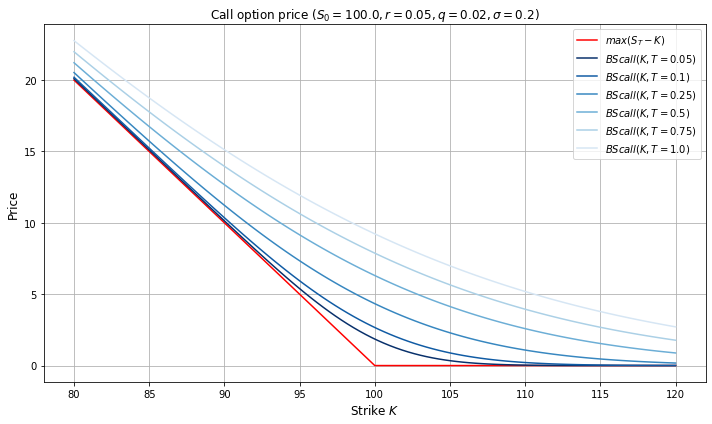

In [58]:
fig, ax = plt.subplots(figsize=(10,6))


ax.plot(k_strip, bs_price_surface.loc[0, :], 'r-', lw=1.5, label="$max(S_T-K)$")

for ttm in ttm_strip:
    ax.plot(k_strip, bs_price_surface.loc[ttm, :], '-', lw=1.5, label="$BScall(K, T={})$".format(ttm))

ax.set_xlabel('Strike $K$', fontsize=12) 
ax.set_ylabel('Price', fontsize=12) 

ax.set_title("Call option price ($S_0={}, r={}, q={}, \sigma={})$".format(S_0, short_rate, dividend_yield, volatility), 
             fontsize=12) 

# Here we add the legend
ax.legend(loc='upper right', ncol=1)

plt.grid(True)
fig.tight_layout()
plt.show()

### With OOP: the `BSCall` class <a name="bscall"></a> 